In [45]:
import numpy as np
import pandas as pd
import time
import sys
import os
import h5py
from joblib import Parallel, delayed
sys.path.append('../')
from packages import actv_analysis, svm, load_csv, stats, objects, test_codes
import pickle
import re
import glob
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [6]:
# Get the current directory
current_dir = os.getcwd()

# Go two directories up
up_two_dir = os.path.dirname(current_dir)

print(up_two_dir)

/Users/dongillee/Interference/codes


In [12]:
net=1; relu=4; epoch=0
pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
with open(pkl_filename, 'rb') as f:
    units = pickle.load(f)

In [11]:
actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=0)

--- 107.34171104431152 seconds ---


In [15]:
units_nonzero = [units[i].id for i in range(len(units)) if units[i].no_response_subset is not True]
units_sample = random.sample(units_nonzero, 200)

In [18]:
avg_actv_net = np.mean(actv_net, axis=2)

In [34]:
avg_actv_net_nxs = avg_actv_net.reshape(actv_net.shape[0],10,10)[units_sample,1:,3:]

In [38]:
aoi = np.mean(avg_actv_net_nxs,axis=0)

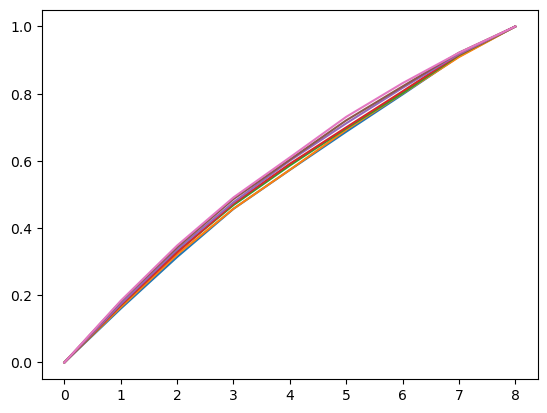

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Assuming aoi is a 2D numpy array
aoi_normalized = scaler.fit_transform(aoi)

for i in range(7):
    sns.lineplot(x=range(aoi_normalized.shape[0]), y=aoi_normalized[:,i])

plt.show()

In [29]:
aoi = np.mean(avg_actv_net_nxs, axis=0)

--- 109.53752875328064 seconds ---
--- 110.32667803764343 seconds ---


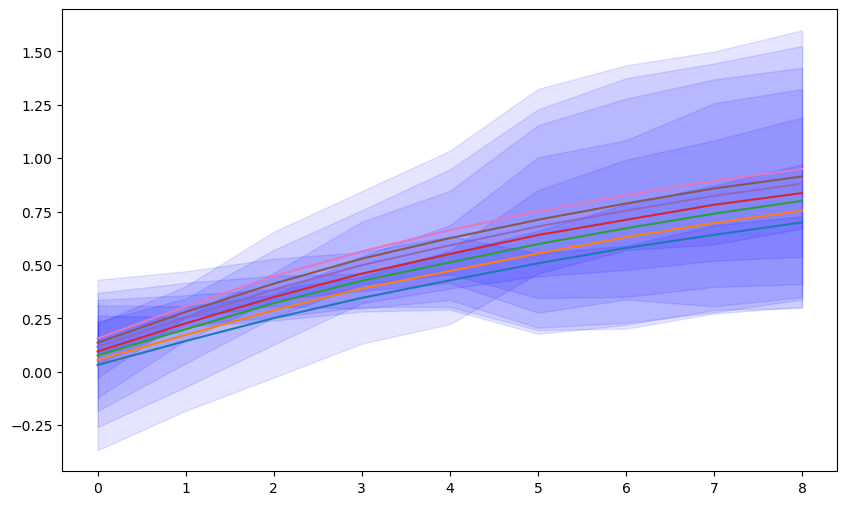

In [49]:
nets = np.arange(1,3)
epoch=0
relu=4

aois = []
for net in nets:
    pkl_filename = f'{up_two_dir}/fig1/pkl/network{net}_Relu{relu}_epoch{epoch}.pkl'
    with open(pkl_filename, 'rb') as f:
        units = pickle.load(f)
    units_nonzero = [units[i].id for i in range(len(units)) if units[i].no_response_subset is not True]
    units_sample = random.sample(units_nonzero, 200)
    
    actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=0)
    avg_actv_net = np.mean(actv_net, axis=2)
    avg_actv_net_nxs = avg_actv_net.reshape(actv_net.shape[0],10,10)[units_sample,1:,3:]
    aoi = np.mean(avg_actv_net_nxs,axis=0)
    aois.append(aoi)

aois = np.array(aois)

# Reshape aois for MinMaxScaler
aois_reshaped = aois.reshape(-1, 1)

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform aois with the scaler
aois_normalized = scaler.fit_transform(aois_reshaped)

# Reshape aois back to its original shape
aois_normalized = aois_normalized.reshape(aois.shape)

# Calculate the mean and the confidence interval
mean_aoi = np.mean(aois_normalized, axis=0)

# Calculate confidence interval
ci = scipy.stats.sem(aois_normalized, axis=0) * scipy.stats.t.ppf((1 + 0.95) / 2, len(aois_normalized) - 1)

# Calculate lower and upper confidence intervals
ci_low = mean_aoi - ci
ci_high = mean_aoi + ci

# Plotting
plt.figure(figsize=(10, 6))

for i in range(aois_normalized.shape[2]):
    sns.lineplot(x=np.arange(aois_normalized.shape[1]), y=mean_aoi[:, i])
    plt.fill_between(np.arange(aois_normalized.shape[1]), ci_low[:, i], ci_high[:, i], color='b', alpha=.1)

plt.show()